In [2]:
import numpy as np
import scipy.sparse
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

In [181]:
class Method1:
    
    def __init__(self, Lyrics="TrackData.csv", Words="Words.txt", Database = "track_metadata.db"):
        
        print("Loading TrackIDs and Lyrics..")
        self.track_lyrics_df = pd.read_csv(Lyrics)

        print("Loading Words..")
        self.words = {}
        f = open(Words)
        for line in f:
            words = line.split(",")
            for i, word in enumerate(words):
                self.words[i+1] = word
        
        print("Loading Track Database..")
        self.db_conn = sqlite3.connect('track_metadata.db')
        
        print("Loading KDD Tree for Lyrics Similarity..")
        self.enc = np.load("Encodings_numpy.pickle.npy", allow_pickle=True)
        self.tree = KDTree(enc, leaf_size=40) 
        
        self.similarSongs = []
        
        print("Loaded!")
        
        
        
    def getLyrics(self, embeddings, words, with_count = False):
        sentence = ""
  
        embeddings = embeddings.replace("[","")
        embeddings = embeddings.replace("]","")
        embeddings = embeddings.replace("'","")
        embeddings = embeddings.replace(" ","")
        embeddings = embeddings.split(",")

        for emb in embeddings:
            ids = emb.split(":")
            sentence += words[int(ids[0])] + " "

        return sentence
    
    def ShowSongs(self, ret = False):
        songs = self.track_lyrics_df['Title'].unique()
        if ret == False:
            print(songs)
        else:
            return songs
        
    def getLyricsSimilarity(self, song, k=5):

            index = self.track_lyrics_df[self.track_lyrics_df['Title'] == song].index[0]
    
            dist, ind = self.tree.query(self.enc[index:index+1], k=int(k)+1)
            self.similarSongs = ind[0]

            self.temp = self.track_lyrics_df[self.track_lyrics_df.index.isin(self.similarSongs)]
            #for row in temp:
                #print("Song: " + row[3] + ", Artist: " + row[4])
            for row in temp[['Title','Artist name']].values:
                print("Song:",row[0],", Artist:",row[1])
        
        #except:
        #    print("Unkown Song")
        
        
        
    def RecommendSongs(self, k=5):
        
        song = input()
        self.getLyricsSimilarity(song, int(k))
    
    def LyricCloud(self):
        
        if len(self.similarSongs) == 0:
            print("Choose Song..")
            self.RecommendSongs()
            
        temp = pd.DataFrame()
        temp['Sentence'] = self.temp['Lyrics'].apply(lambda x: self.getLyrics(x, self.words))
        stopwords = set(STOPWORDS)
        comment_words = ""

        # iterate through the csv file
        for val in temp.Sentence:

            # typecaste each val to string
            val = str(val)

            # split the value
            tokens = val.split()

            # Converts each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            comment_words += " ".join(tokens)+" "
            
        
        wordcloud = WordCloud(width = 800, height = 800, background_color ='white',
                              stopwords = stopwords, min_font_size = 10).generate(comment_words)
 
        # plot the WordCloud image                      
        plt.figure(figsize = (5, 5), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()

        

In [182]:
model = Method1()

Loading TrackIDs and Lyrics..
Loading Words..
Loading Track Database..
Loading KDD Tree for Lyrics Similarity..
Loaded!


In [183]:
model.ShowSongs()

['A Poor Recipe For Civic Cohesion' 'Soul Deep' "It's About Time" ...
 'No Angels' 'Dear Lie' 'Trans-Island Skyway (Album Version)']


In [184]:
model.RecommendSongs(6)

Soul Deep
Song: There_ Now I've Said It , Artist: Further Seems Forever
Song: Lover Come Back , Artist: Lou Gramm
Song: Green Is The Colour (1996 Digital Remaster) , Artist: Pink Floyd
Song: Indigo (Live at Brixton) , Artist: Moloko
Song: Against The Grain , Artist: City and Colour
Song: Mi Vestido Floreado , Artist: Los Brujos


In [168]:
def getLyrics(embeddings, words, with_count = False):
        sentence = ""
        embeddings = embeddings.replace("[","")
        embeddings = embeddings.replace("]","")
        embeddings = embeddings.replace("'","")
        embeddings = embeddings.replace(" ","")
        embeddings = embeddings.split(",")

        for emb in embeddings:
            ids = emb.split(":")
            sentence += words[int(ids[0])] + " "

        return sentence

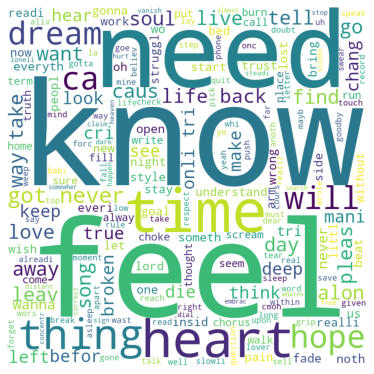

In [185]:
model.LyricCloud()